# Stock Price Prediction

In this version we are going to treat the stock price prediction as a regression problem. We will be targeting this problem using two approaches, Linear Regression and Decision Tree.

## Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle

%matplotlib inline

## Loading the Data

In [3]:
dataset = pd.read_csv('../Datasets/NFLX.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


### Getting the number of trading days

In [4]:
dataset.shape

(1009, 7)

Number of trading days = 1009

## Visualization

### Close Price

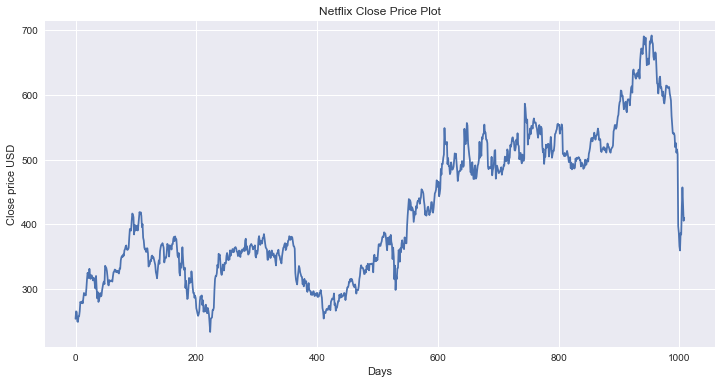

In [5]:
plt.style.use('seaborn')

plt.figure(figsize=(12, 6))
plt.plot(dataset['Close'])
plt.title('Netflix Close Price Plot')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.grid(True)
plt.show()

# Prediction

We are going to predict `x` days in the future. Day 1 will predict Day (x+1), Day 2 will predict Day (x+2) and so on...

We set `future_days = x`, and we create a new `Prediction` column, that will have values from `Close` column shifted up by `future_days`. 

```
Let future_days = 10
Prediction[Row 1] = Close[Row 11]
Prediction[Row 2] = Close[Row 12]
...
```

In [7]:
price = dataset[['Close']]

In [9]:
future_days = 25

price['Prediction'] = price[['Close']].shift(-future_days)
price.tail()

C:\Users\ABCL\AppData\Local\Temp/ipykernel_7860/1221308409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Prediction'] = price[['Close']].shift(-future_days)


,Close,Prediction
1004,427.140015,NaN
1005,457.130005,NaN
1006,429.480011,NaN
1007,405.600006,NaN
1008,410.170013,NaN


## Creating Datasets

### Feature Dataset (X)
Drop the column `Prediction`, and create a numpy array. Exclude the last `future_days` number of rows.

In [11]:
X = np.array(price.drop(['Prediction'], 1))[:-future_days]
X

C:\Users\ABCL\AppData\Local\Temp/ipykernel_7860/3203233062.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(price.drop(['Prediction'], 1))[:-future_days]


array([[254.259995],
       [265.720001],
       [264.559998],
       [250.100006],
       [249.470001],
       [257.950012],
       [258.269989],
       [266.      ],
       [280.269989],
       [278.519989],
       [278.549988],
       [281.040009],
       [278.140015],
       [285.929993],
       [294.160004],
       [290.609985],
       [291.380005],
       [290.390015],
       [301.049988],
       [315.      ],
       [325.220001],
       [321.160004],
       [317.      ],
       [331.440002],
       [321.299988],
       [315.880005],
       [321.549988],
       [321.089996],
       [318.450012],
       [313.480011],
       [317.5     ],
       [316.480011],
       [306.700012],
       [300.940002],
       [320.350006],
       [300.690002],
       [285.769989],
       [295.350006],
       [280.290009],
       [283.670013],
       [288.940002],
       [293.970001],
       [288.850006],
       [289.929993],
       [298.070007],
       [303.670013],
       [309.25    ],
       [311.6

### Target Dataset (y)

Create a numpy array of column `Prediction` and exclude the last `future_days` number of records.

In [12]:
y = np.array(price['Prediction'])[:-future_days]
y

array([315.880005, 321.549988, 321.089996, 318.450012, 313.480011,
       317.5     , 316.480011, 306.700012, 300.940002, 320.350006,
       300.690002, 285.769989, 295.350006, 280.290009, 283.670013,
       288.940002, 293.970001, 288.850006, 289.929993, 298.070007,
       303.670013, 309.25    , 311.649994, 307.779999, 336.059998,
       334.519989, 332.700012, 327.769989, 318.690002, 307.019989,
       305.76001 , 313.980011, 311.76001 , 312.459991, 313.299988,
       313.359985, 311.690002, 320.089996, 326.26001 , 326.890015,
       330.299988, 329.600006, 326.459991, 328.529999, 326.130005,
       328.190002, 325.220001, 324.179993, 331.820007, 331.619995,
       344.720001, 349.290009, 351.290009, 349.730011, 353.540009,
       351.600006, 359.929993, 361.809998, 365.799988, 367.450012,
       361.399994, 360.570007, 361.450012, 363.829987, 379.929993,
       392.869995, 391.980011, 390.399994, 404.980011, 416.76001 ,
       415.440002, 411.089996, 384.480011, 399.390015, 390.390

### Splitting the datasets into train and test

Split into 75% training and 25% test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Decision Tree

### Model Initialisation

In [14]:
tree = DecisionTreeRegressor()

### Fit the Model over the training data

In [72]:
tree = tree.fit(x_train, y_train)

### Prediction

**Validation Test**
First, we will create a dataset that will be used as the input to predict the future days. This dataset will contain the close price of the last `future_days` number of records after excluding `future_days` records from the original dataset.

For instance,
- Assume we have 100 days worth of data, i.e we have 100 records in our original dataset
- Assume we are going to predict 10 days into the future
- `Prediction[81:90]` are to be predicted. To predict these values we will be using the `Close[81:90]` values.
    - `Close[81]` predicts `Prediction[81]`
    - `Close[82]` predicts `Prediction[82]` and so on

We already have values for `Close[91:100]`. Thus we can compare the values `Close[91:100]` and `Prediction[81:90]`, to see how our selected model behaves. 

In [73]:
x_future = price.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\ABCL\AppData\Local\Temp/ipykernel_7860/3405190683.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = price.drop(['Prediction'], 1)[:-future_days]


array([[658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ],
       [614.090027],
       [613.119995],
       [610.710022],
       [610.539978],
       [612.090027]])

In [74]:
tree_predictions = tree.predict(x_future)
tree_predictions

array([602.440002, 597.369995, 616.469971, 567.52002 , 553.289978,
       553.289978, 539.849976, 645.719971, 537.219971, 519.200012,
       429.480011, 510.799988, 386.700012, 508.25    , 397.5     ,
       387.149994, 366.420013, 359.700012, 386.700012, 384.359985,
       427.140015, 645.719971, 429.480011, 405.600006, 410.170013])

#### Visualization of the predictions against validation set

C:\Users\ABCL\AppData\Local\Temp/ipykernel_7860/944550043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions # These are the predictions for the cost price for the last `future_days` number of records


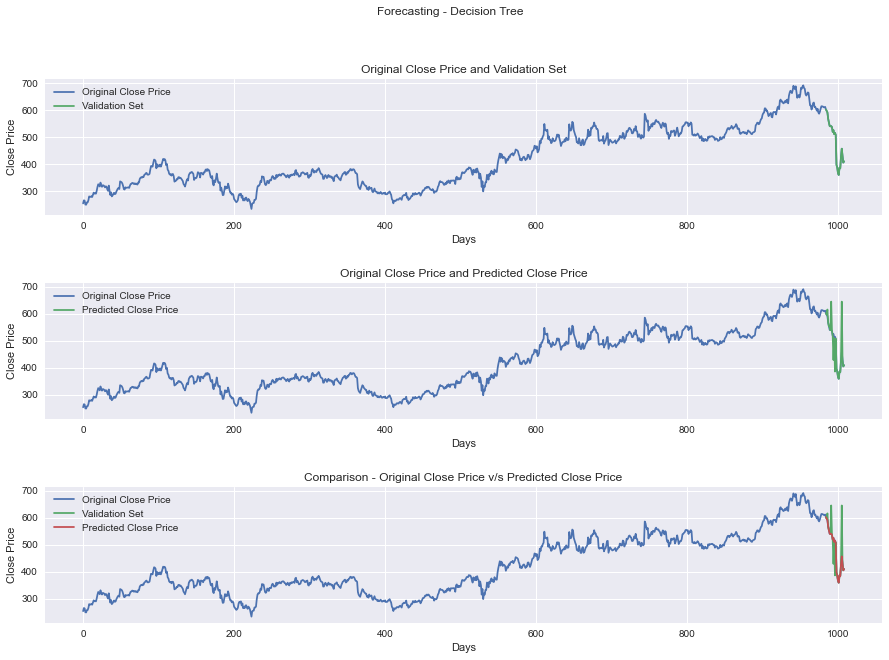

In [75]:
predictions = tree_predictions

# Validation Set
valid = price[X.shape[0]:] # This includes the `Close` price for last `future_days` number of records.
valid['Prediction'] = predictions # These are the predictions for the cost price for the last `future_days` number of records

plt.figure(figsize=(15,10))
plt.suptitle('Forecasting - Decision Tree')
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,1)
plt.title('Original Close Price and Validation Set')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(price['Close'])
plt.plot(valid['Close'])
plt.legend(['Original Close Price', 'Validation Set'])

plt.subplot(3,1,2)
plt.title('Original Close Price and Predicted Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(price['Close'])
plt.plot(valid['Prediction'])
plt.legend(['Original Close Price', 'Predicted Close Price'])

plt.subplot(3,1,3)
plt.title('Comparison - Original Close Price v/s Predicted Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(price['Close'])
plt.plot(valid[['Prediction', 'Close']])
plt.legend(['Original Close Price', 'Validation Set', 'Predicted Close Price'])

plt.show()

#### Performance Metrics for the decision tree model

**R2 Score**

In [76]:
r2_score(valid['Close'], valid['Prediction'])

0.5173978799325356

### Save the model

In [77]:
file = open('decision_tree_forecasting.pkl', 'wb')
pickle.dump(tree, file)

## Linear Regression

### Model Initialisation

In [78]:
lr = LinearRegression()

### Fit the model

In [79]:
lr = lr.fit(x_train, y_train)

### Prediction

In [80]:
# Using `x_future` from before
lr_predictions = lr.predict(x_future)
lr_predictions

array([635.40775885, 641.93005796, 640.33277891, 620.86358959,
       599.45103025, 598.29738865, 585.57234423, 594.94310779,
       606.38149011, 608.59994803, 593.44342847, 594.0290774 ,
       587.72867911, 581.89856461, 588.15460528, 575.74900637,
       571.90662129, 578.12718616, 588.04812374, 596.31854105,
       596.18546641, 595.32467634, 593.18610687, 593.03521269,
       594.41070008])

#### Visualization of the predictions against validation set

C:\Users\ABCL\AppData\Local\Temp/ipykernel_7860/3013803779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions # These are the predictions for the cost price for the last `future_days` number of records


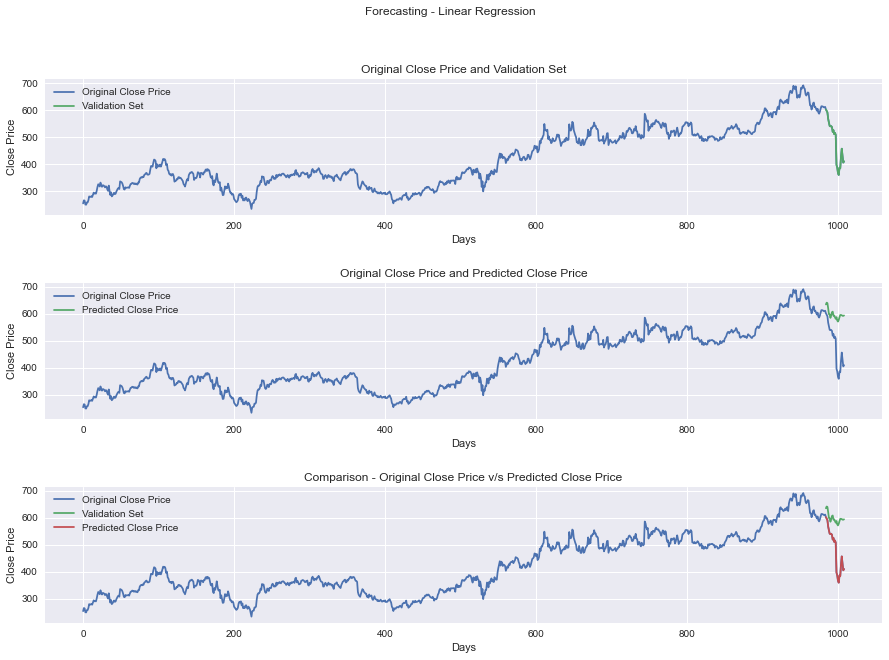

In [81]:
predictions = lr_predictions

# Validation Set
valid = price[X.shape[0]:] # This includes the `Close` price for last `future_days` number of records.
valid['Prediction'] = predictions # These are the predictions for the cost price for the last `future_days` number of records

plt.figure(figsize=(15,10))
plt.suptitle('Forecasting - Linear Regression')
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,1)
plt.title('Original Close Price and Validation Set')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(price['Close'])
plt.plot(valid['Close'])
plt.legend(['Original Close Price', 'Validation Set'])

plt.subplot(3,1,2)
plt.title('Original Close Price and Predicted Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(price['Close'])
plt.plot(valid['Prediction'])
plt.legend(['Original Close Price', 'Predicted Close Price'])

plt.subplot(3,1,3)
plt.title('Comparison - Original Close Price v/s Predicted Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(price['Close'])
plt.plot(valid[['Prediction', 'Close']])
plt.legend(['Original Close Price', 'Validation Set', 'Predicted Close Price'])

plt.show()

#### Performance Metrics for the Linear Regression model

**R2 Score**

In [82]:
r2_score(valid['Close'], valid['Prediction'])

-1.92684926512205

### Save the Model

In [83]:
file = open('linear_regression_forecasting.pkl', 'wb')
pickle.dump(tree, file)